# Estymatory największej wiarygodności

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [12]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

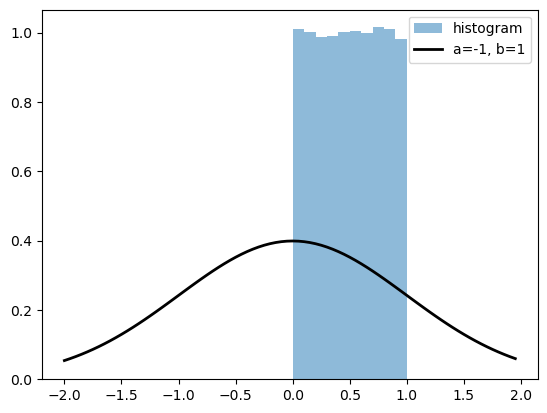

In [16]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

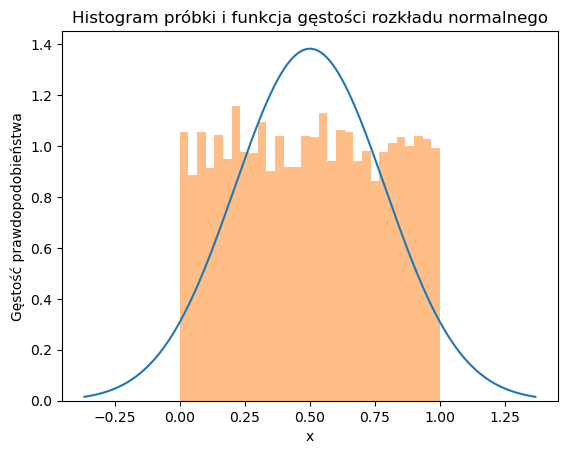

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000 # liczba elementów próbki
a, b = 0, 1 # przedział losowania próbki

# losowanie próbki z rozkładu jednostajnego
sample = np.random.uniform(low=a, high=b, size=n)

# wyliczenie parametrów rozkładu normalnego
mu = np.mean(sample)
sigma_squared = np.var(sample)

# rysowanie funkcji gęstości rozkładu normalnego
x = np.linspace(mu - 3*np.sqrt(sigma_squared), mu + 3*np.sqrt(sigma_squared), 1000)
y = 1/np.sqrt(2*np.pi*sigma_squared) * np.exp(-(x-mu)**2/(2*sigma_squared))
plt.plot(x, y)

# wykres histogramu próbki
plt.hist(sample, bins=30, density=True, alpha=0.5)

# ustawienie tytułu i etykiet osi
plt.title('Histogram próbki i funkcja gęstości rozkładu normalnego')
plt.xlabel('x')
plt.ylabel('Gęstość prawdopodobieństwa')

# wyświetlenie wykresu
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

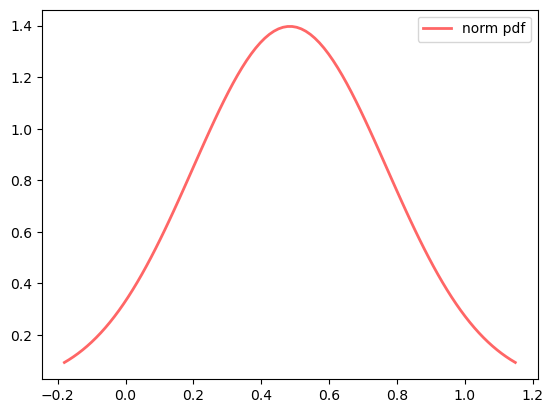

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

def losuje(sample):
    # Dopasowanie rozkładu normalnego do próbki
    mu, std = norm.fit(sample)

    # Wykreślenie funkcji gęstości rozkładu normalnego
    x = np.linspace(norm.ppf(0.01, loc=mu, scale=std), norm.ppf(0.99, loc=mu, scale=std), 100)
    plt.plot(x, norm.pdf(x, loc=mu, scale=std), 'r-', lw=2, alpha=0.6, label='norm pdf')

    # Wyświetlenie wykresu
    plt.legend()
    plt.show()

# Losowanie próbki z rozkładu jednostajnego
sample = uniform.rvs(size=1000)
losuje(sample)


# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [5]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [6]:

def log_likelihood(X, mu, sigma):

    n = len(X)
    log_likelihood = np.log(Gpdf(X, mu, sigma))
    return log_likelihood

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [12]:
import numpy as np

# Definicja funkcji obliczającej MLE dla sigma
def uniform_mle_sigma(data):
    return np.min(data)

# Przykładowe dane
data = uniform.rvs(size=1000)

# Obliczenie MLE dla różnych wartości parametrów
mu = [0, 0, 1, 0.5]
sigma = [1, 2, 1, 0.2]
for i in range(len(mu)):
    print("Parametry: mu = {}, sigma = {}".format(mu[i], sigma[i]))
    mle_sigma = uniform_mle_sigma(data)
    print("MLE dla sigma: {:.3f}\n".format(mle_sigma))

Parametry: mu = 0, sigma = 1
MLE dla sigma: 0.005

Parametry: mu = 0, sigma = 2
MLE dla sigma: 0.005

Parametry: mu = 1, sigma = 1
MLE dla sigma: 0.005

Parametry: mu = 0.5, sigma = 0.2
MLE dla sigma: 0.005



# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [16]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

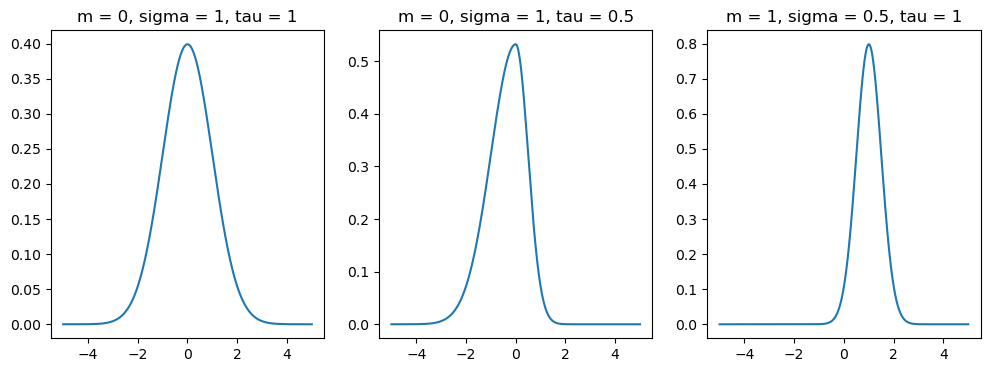

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def split_gaussian(x, m, sigma, tau):
    c = np.sqrt(2 / np.pi) / sigma / (1 + tau)
    fx = np.zeros_like(x)
    fx[x <= m] = c * np.exp(-0.5 / sigma**2 * (x[x <= m] - m)**2)
    fx[x > m] = c * np.exp(-0.5 / (tau * sigma)**2 * (x[x > m] - m)**2)
    return fx

# Parametry i zakres zmiennej niezależnej
m_vals = [0, 0, 1]
sigma_vals = [1, 1, 0.5]
tau_vals = [1, 1/2, 1]
x = np.linspace(-5, 5, 1000)

# Rysowanie wykresów
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in range(len(m_vals)):
    fx = split_gaussian(x, m_vals[i], sigma_vals[i], tau_vals[i])
    axes[i].plot(x, fx)
    axes[i].set_title("m = {}, sigma = {}, tau = {}".format(m_vals[i], sigma_vals[i], tau_vals[i]))
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [20]:
import numpy as np
from scipy.stats import norm

def split_normal_log_likelihood(X, m, sigma, tau):
    n = len(X)
    log_likelihood = 0
    for x in X:
        if x <= m:
            log_likelihood += np.log(norm.pdf(x, loc=m, scale=sigma))
        else:
            log_likelihood += np.log(norm.pdf(x, loc=m, scale=sigma*tau))
    return log_likelihood

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [21]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin